In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [18]:
df=pd.read_csv("D:/firstproject/car_price_dataset.csv")

In [19]:
df

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867
...,...,...,...,...,...,...,...,...,...,...
9995,Kia,Optima,2004,3.7,Diesel,Semi-Automatic,5794,2,4,8884
9996,Chevrolet,Impala,2002,1.4,Electric,Automatic,168000,2,1,6240
9997,BMW,3 Series,2010,3.0,Petrol,Automatic,86664,5,1,9866
9998,Ford,Explorer,2002,1.4,Hybrid,Automatic,225772,4,1,4084


In [20]:
df.isnull().sum()

Brand           0
Model           0
Year            0
Engine_Size     0
Fuel_Type       0
Transmission    0
Mileage         0
Doors           0
Owner_Count     0
Price           0
dtype: int64

In [21]:
print(df['Brand'].unique)

<bound method Series.unique of 0              Kia
1        Chevrolet
2         Mercedes
3             Audi
4       Volkswagen
           ...    
9995           Kia
9996     Chevrolet
9997           BMW
9998          Ford
9999    Volkswagen
Name: Brand, Length: 10000, dtype: object>


In [22]:
df.describe()

,Year,Engine_Size,Mileage,Doors,Owner_Count,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,2011.543700,3.000560,149239.111800,3.497100,2.991100,8852.96440
std,6.897699,1.149324,86322.348957,1.110097,1.422682,3112.59681
min,2000.000000,1.000000,25.000000,2.000000,1.000000,2000.00000
25%,2006.000000,2.000000,74649.250000,3.000000,2.000000,6646.00000
50%,2012.000000,3.000000,149587.000000,3.000000,3.000000,8858.50000
75%,2017.000000,4.000000,223577.500000,4.000000,4.000000,11086.50000
max,2023.000000,5.000000,299947.000000,5.000000,5.000000,18301.00000


In [23]:
df2=df.groupby(by='Brand')['Brand'].count()

In [24]:
df2

Brand
Audi          1038
BMW            999
Chevrolet     1003
Ford          1048
Honda         1009
Hyundai        995
Kia            976
Mercedes       942
Toyota         970
Volkswagen    1020
Name: Brand, dtype: int64

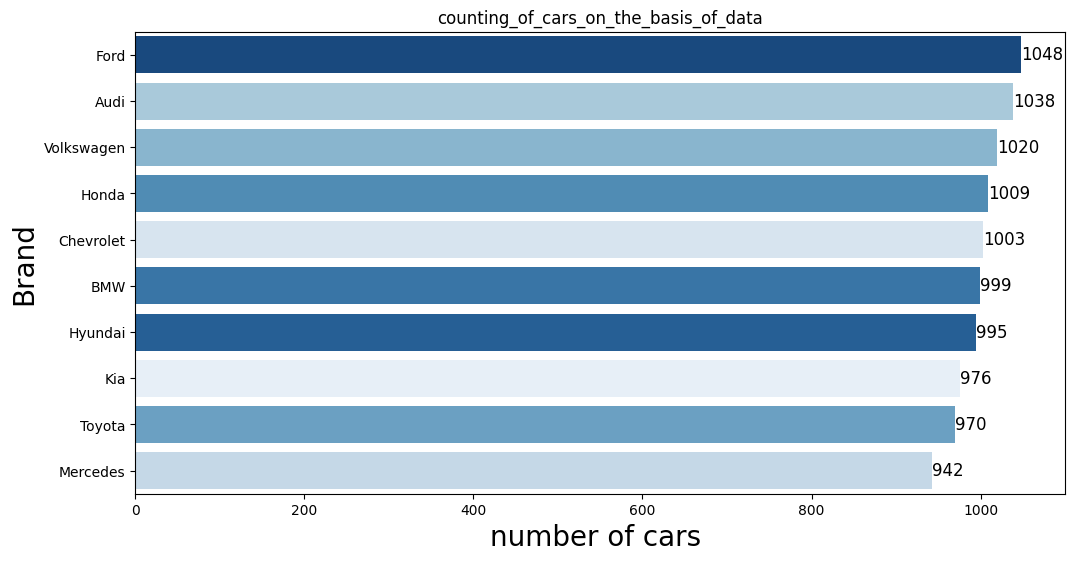

In [25]:
plt.figure(figsize=(12,6))
sorted_brands = df['Brand'].value_counts().index  # Sort by count

a = sns.countplot(y='Brand', data=df, hue='Brand',palette='Blues', order=sorted_brands)
for bars in a.containers:
    for bar in bars:
        a.text(bar.get_width() + 0.2, bar.get_y() + bar.get_height()/2,
               f'{int(bar.get_width())}', ha='left', va='center', fontsize=12)

plt.xlabel("number of cars ",fontsize=20)
plt.ylabel('Brand',fontsize=20)
plt.title("counting_of_cars_on_the_basis_of_data")
plt.show()

In [26]:
dfaudi=df[df["Brand"]=='Ford']

In [27]:
dfaudi=dfaudi.sort_values(by='Price')

C:\Users\hp\AppData\Local\Temp\ipykernel_1404\3547573258.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


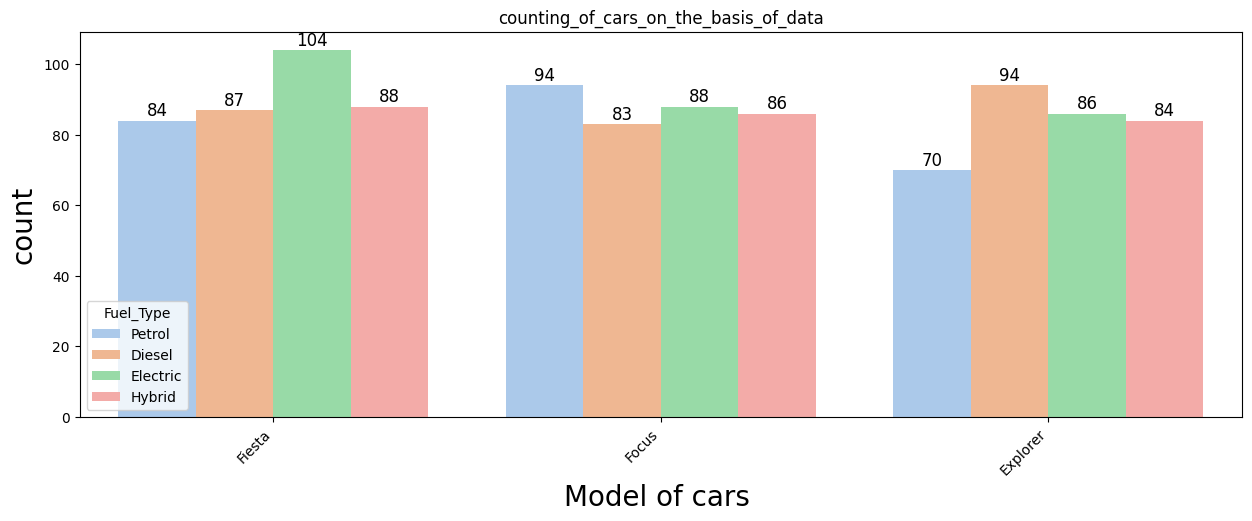

In [28]:
plt.figure(figsize=(15,5))
sorted_models = dfaudi['Model'].value_counts().index
ax = sns.countplot(x='Model', data=dfaudi, hue='Fuel_Type',palette='pastel', order=sorted_models)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
for bars in ax.containers:
    for bar in bars:
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.2,
                f'{int(bar.get_height())}', ha='center', va='bottom', fontsize=12)
plt.xlabel("Model of cars ",fontsize=20)
plt.ylabel('count',fontsize=20)
plt.title("counting_of_cars_on_the_basis_of_data")
plt.show()

<Axes: xlabel='Year', ylabel='Price'>

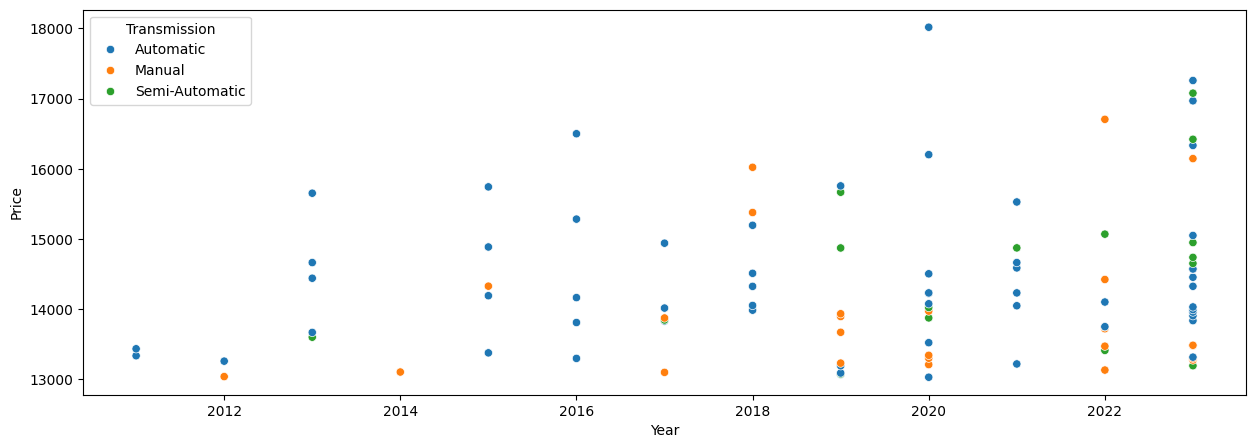

In [29]:
plt.figure(figsize=(15,5))
sns.scatterplot(y='Price',x='Year',data=dfaudi.tail(100),hue='Transmission',sizes=(200,400,100))


In [30]:
dfaudi.groupby(by=['Model','Transmission'])['Transmission'].count()

Model     Transmission  
Explorer  Automatic         101
          Manual            107
          Semi-Automatic    126
Fiesta    Automatic         118
          Manual            121
          Semi-Automatic    124
Focus     Automatic         128
          Manual            109
          Semi-Automatic    114
Name: Transmission, dtype: int64

Text(0.5, 1.0, 'counting_of_cars_on_the_basis_of_data')

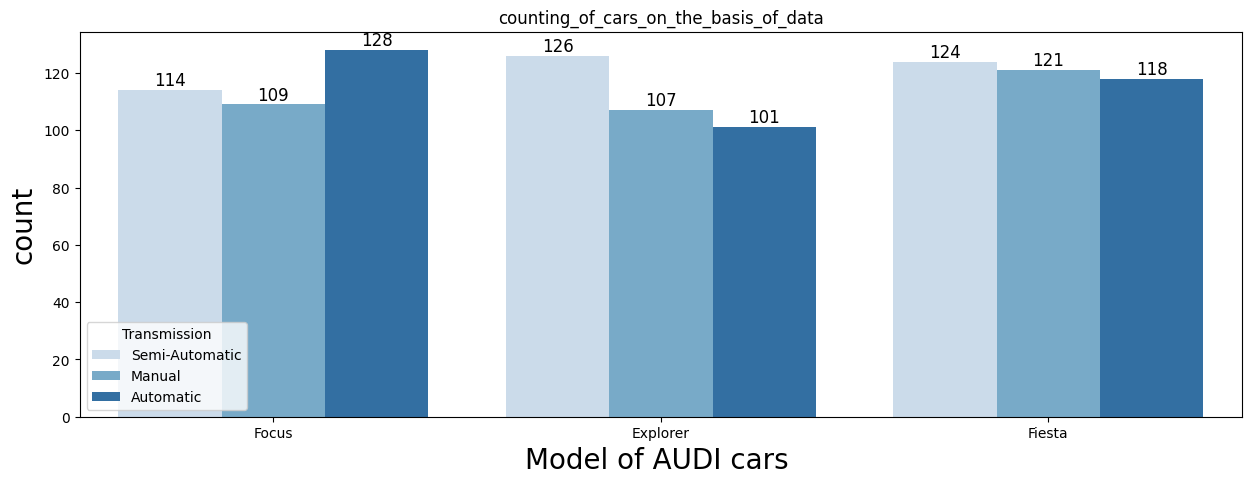

In [31]:
plt.figure(figsize=(15,5))
ax=sns.countplot(x='Model',data=dfaudi,hue='Transmission',palette='Blues')
for bars in ax.containers:
    for bar in bars:
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.2,
                f'{int(bar.get_height())}', ha='center', va='bottom', fontsize=12)
plt.xlabel("Model of AUDI cars ",fontsize=20)
plt.ylabel('count',fontsize=20)
plt.title("counting_of_cars_on_the_basis_of_data")

In [32]:
df['Year'],df['Year'].min

(0       2020
 1       2012
 2       2020
 3       2023
 4       2003
         ... 
 9995    2004
 9996    2002
 9997    2010
 9998    2002
 9999    2001
 Name: Year, Length: 10000, dtype: int64,
 <bound method Series.min of 0       2020
 1       2012
 2       2020
 3       2023
 4       2003
         ... 
 9995    2004
 9996    2002
 9997    2010
 9998    2002
 9999    2001
 Name: Year, Length: 10000, dtype: int64>)

In [33]:
dfaudi

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
778,Ford,Focus,2001,1.2,Petrol,Semi-Automatic,219120,3,4,2000
4199,Ford,Explorer,2004,1.7,Diesel,Manual,290006,2,5,2000
5576,Ford,Focus,2001,1.8,Petrol,Semi-Automatic,239923,2,1,2000
4880,Ford,Explorer,2000,1.4,Electric,Semi-Automatic,298968,5,1,2000
5616,Ford,Fiesta,2000,2.7,Petrol,Semi-Automatic,256882,2,3,2000
...,...,...,...,...,...,...,...,...,...,...
7106,Ford,Fiesta,2022,4.1,Electric,Manual,4726,3,1,16705
9616,Ford,Focus,2023,4.0,Electric,Automatic,76511,3,4,16969
3231,Ford,Explorer,2023,4.6,Electric,Semi-Automatic,26070,2,4,17078
146,Ford,Explorer,2023,4.1,Electric,Automatic,67072,4,3,17258


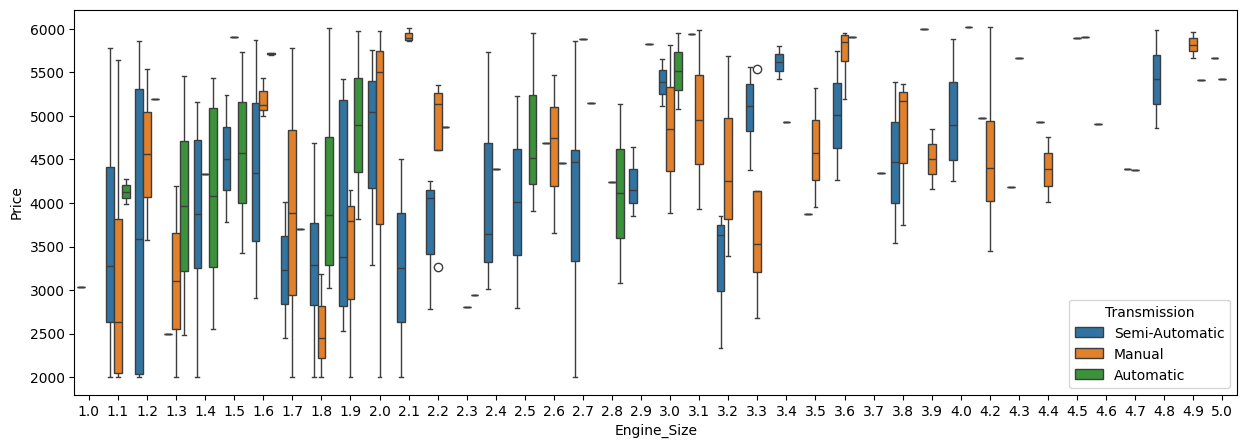

In [34]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Engine_Size',y='Price',data=dfaudi.head(200),hue='Transmission')
plt.show()

In [35]:
dfaBMW=df[df["Brand"]=='BMW']

C:\Users\hp\AppData\Local\Temp\ipykernel_1404\2783415182.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


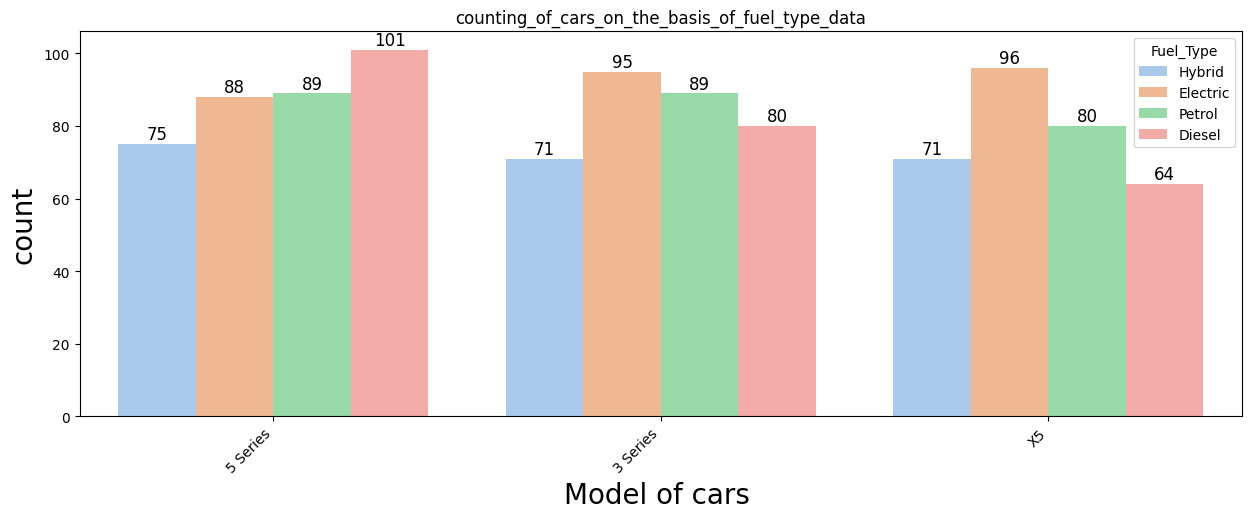

In [36]:
plt.figure(figsize=(15,5))
sorted_models =dfaBMW['Model'].value_counts().index
ax = sns.countplot(x='Model', data=dfaBMW, hue='Fuel_Type',palette='pastel', order=sorted_models)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
for bars in ax.containers:
    for bar in bars:
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.2,
                f'{int(bar.get_height())}', ha='center', va='bottom', fontsize=12)
plt.xlabel("Model of cars ",fontsize=20)
plt.ylabel('count',fontsize=20)
plt.title("counting_of_cars_on_the_basis_of_fuel_type_data")
plt.show()

In [37]:
dfaBMW.groupby(by=['Model','Transmission'])['Transmission'].count()

Model     Transmission  
3 Series  Automatic         112
          Manual            117
          Semi-Automatic    106
5 Series  Automatic         119
          Manual            110
          Semi-Automatic    124
X5        Automatic         109
          Manual             98
          Semi-Automatic    104
Name: Transmission, dtype: int64

Text(0.5, 1.0, 'counting_of_cars_on_the_basis_of_Transmission_data')

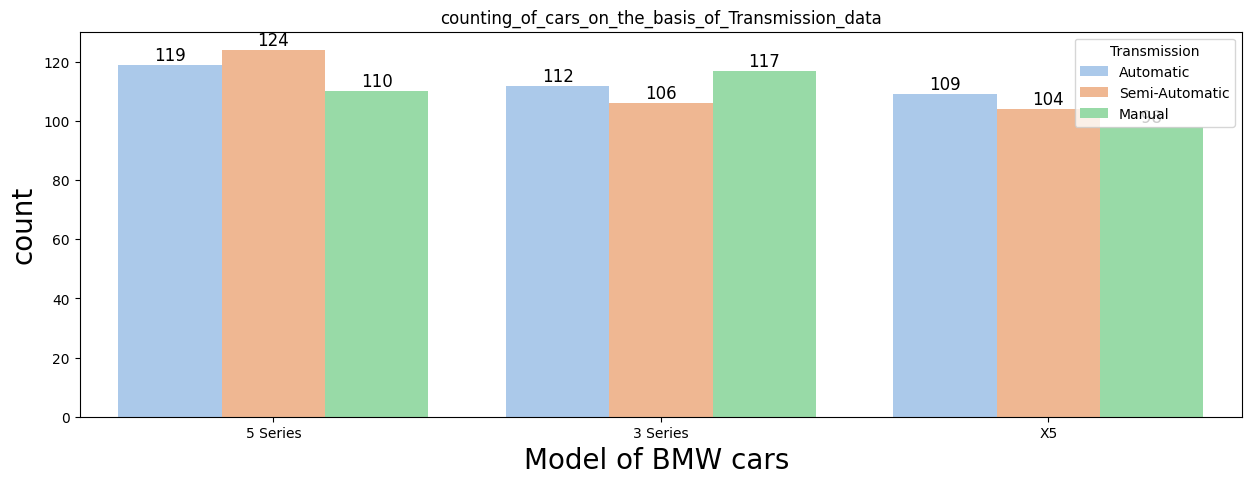

In [38]:
plt.figure(figsize=(15,5))
ax=sns.countplot(x='Model',data=dfaBMW,hue='Transmission',palette='pastel')
for bars in ax.containers:
    for bar in bars:
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.2,
                f'{int(bar.get_height())}', ha='center', va='bottom', fontsize=12)
plt.xlabel("Model of BMW cars ",fontsize=20)
plt.ylabel('count',fontsize=20)
plt.title("counting_of_cars_on_the_basis_of_Transmission_data")

Text(0.5, 1.0, 'counting_of_cars_on_the_basis_of_Transmission_data')

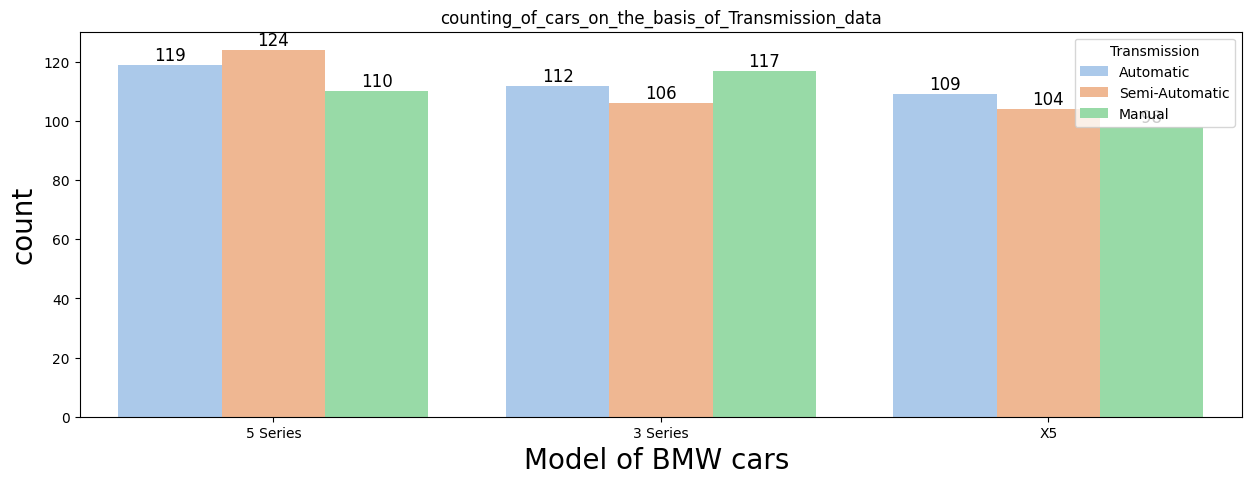

In [39]:
plt.figure(figsize=(15,5))
ax=sns.countplot(x='Model',data=dfaBMW,hue='Transmission',palette='pastel')
for bars in ax.containers:
    for bar in bars:
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.2,
                f'{int(bar.get_height())}', ha='center', va='bottom', fontsize=12)
plt.xlabel("Model of BMW cars ",fontsize=20)
plt.ylabel('count',fontsize=20)
plt.title("counting_of_cars_on_the_basis_of_Transmission_data")

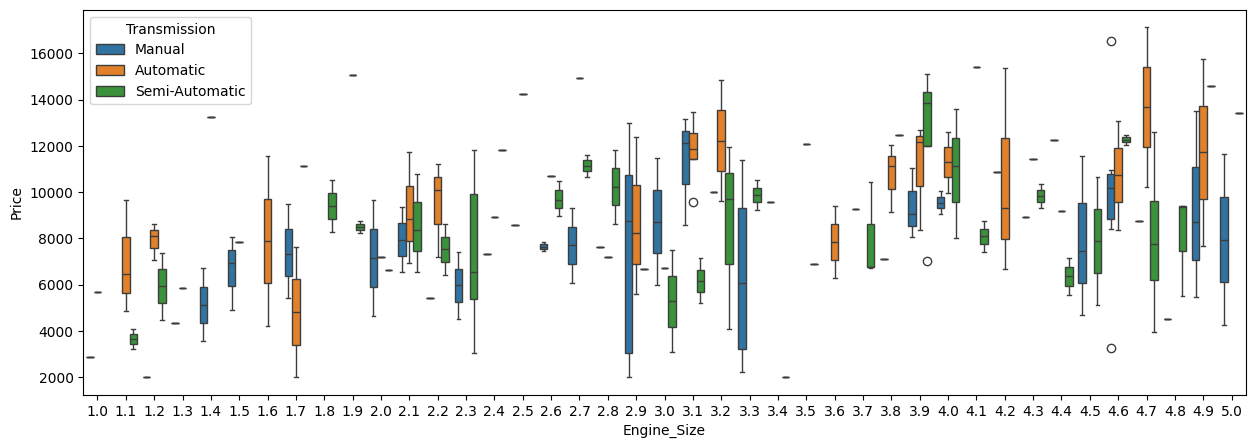

In [40]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Engine_Size',y='Price',data=dfaBMW.head(200),hue='Transmission')
plt.show()

In [41]:
dfVolkswagen=df[df["Brand"]=='Volkswagen']

C:\Users\hp\AppData\Local\Temp\ipykernel_1404\3200918818.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


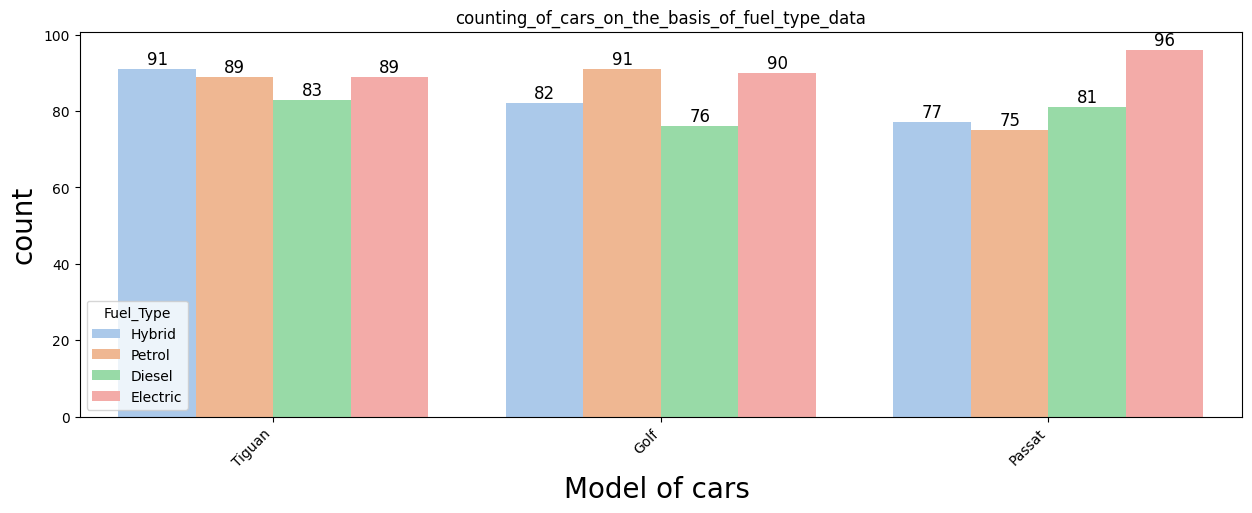

In [42]:
plt.figure(figsize=(15,5))
sorted_models =dfVolkswagen['Model'].value_counts().index
ax = sns.countplot(x='Model', data=dfVolkswagen, hue='Fuel_Type',palette='pastel', order=sorted_models)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
for bars in ax.containers:
    for bar in bars:
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.2,
                f'{int(bar.get_height())}', ha='center', va='bottom', fontsize=12)
plt.xlabel("Model of cars ",fontsize=20)
plt.ylabel('count',fontsize=20)
plt.title("counting_of_cars_on_the_basis_of_fuel_type_data")
plt.show()

In [43]:
dfVolkswagen.groupby(by=['Model','Transmission'])['Transmission'].count()

Model   Transmission  
Golf    Automatic         103
        Manual            108
        Semi-Automatic    128
Passat  Automatic         110
        Manual            110
        Semi-Automatic    109
Tiguan  Automatic         130
        Manual            122
        Semi-Automatic    100
Name: Transmission, dtype: int64

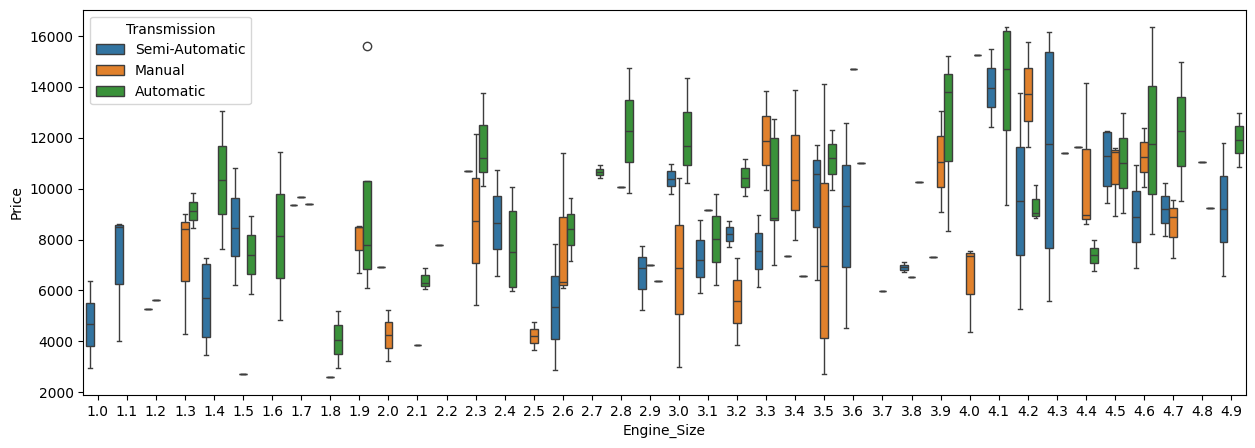

In [44]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Engine_Size',y='Price',data=dfVolkswagen.head(200),hue='Transmission')
plt.show()

Text(0.5, 1.0, 'counting_of_cars_on_the_basis_of_Transmission_data')

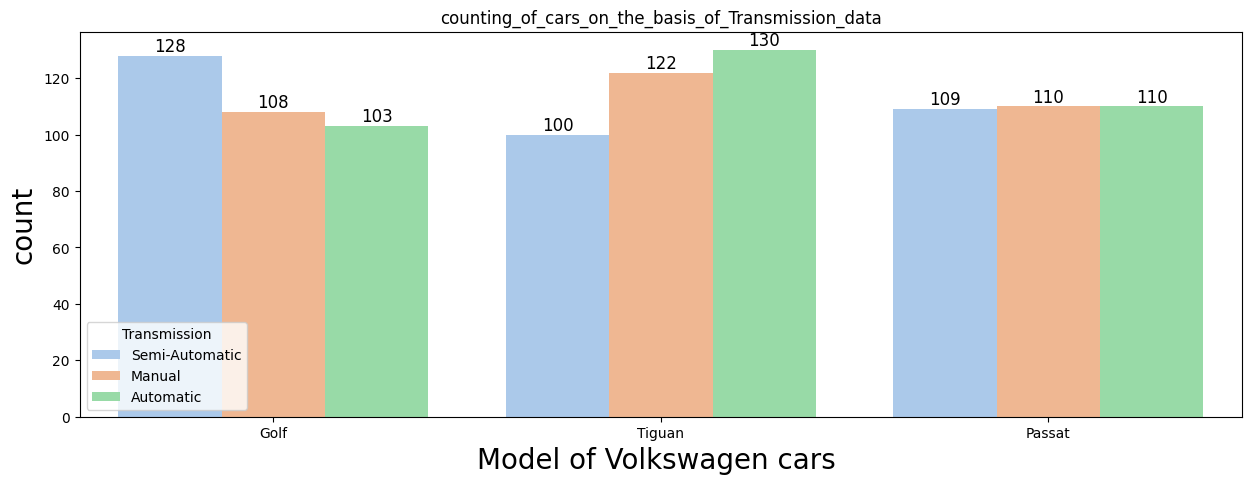

In [45]:
plt.figure(figsize=(15,5))
ax=sns.countplot(x='Model',data=dfVolkswagen,hue='Transmission',palette='pastel')
for bars in ax.containers:
    for bar in bars:
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.2,
                f'{int(bar.get_height())}', ha='center', va='bottom', fontsize=12)
plt.xlabel("Model of Volkswagen cars ",fontsize=20)
plt.ylabel('count',fontsize=20)
plt.title("counting_of_cars_on_the_basis_of_Transmission_data")

In [46]:
df

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867
...,...,...,...,...,...,...,...,...,...,...
9995,Kia,Optima,2004,3.7,Diesel,Semi-Automatic,5794,2,4,8884
9996,Chevrolet,Impala,2002,1.4,Electric,Automatic,168000,2,1,6240
9997,BMW,3 Series,2010,3.0,Petrol,Automatic,86664,5,1,9866
9998,Ford,Explorer,2002,1.4,Hybrid,Automatic,225772,4,1,4084


In [66]:
dfsum=df.groupby(['Brand','Model'])['Price'].sum().sort_values(ascending=False)

In [67]:
dfsum

Brand       Model   
Ford        Fiesta      3256501
Volkswagen  Tiguan      3202800
Chevrolet   Impala      3195396
Honda       Accord      3191473
Audi        Q5          3134340
            A4          3121987
Ford        Focus       3080158
BMW         5 Series    3060234
Hyundai     Elantra     3054459
Kia         Optima      3022763
Audi        A3          3012363
Volkswagen  Golf        2971415
BMW         3 Series    2966342
Chevrolet   Malibu      2963094
Ford        Explorer    2940835
Volkswagen  Passat      2932730
Toyota      Corolla     2923901
Hyundai     Tucson      2891604
Chevrolet   Equinox     2884241
Mercedes    E-Class     2878513
Kia         Rio         2868631
Honda       Civic       2861822
Mercedes    GLA         2850701
Toyota      RAV4        2813651
            Camry       2796687
Hyundai     Sonata      2788325
Kia         Sportage    2775570
Mercedes    C-Class     2730028
Honda       CR-V        2690292
BMW         X5          2668788
Name: Price, dtype:

C:\Users\hp\AppData\Local\Temp\ipykernel_1404\799173368.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Brand',y='Price',data=dfsum,palette='Accent')


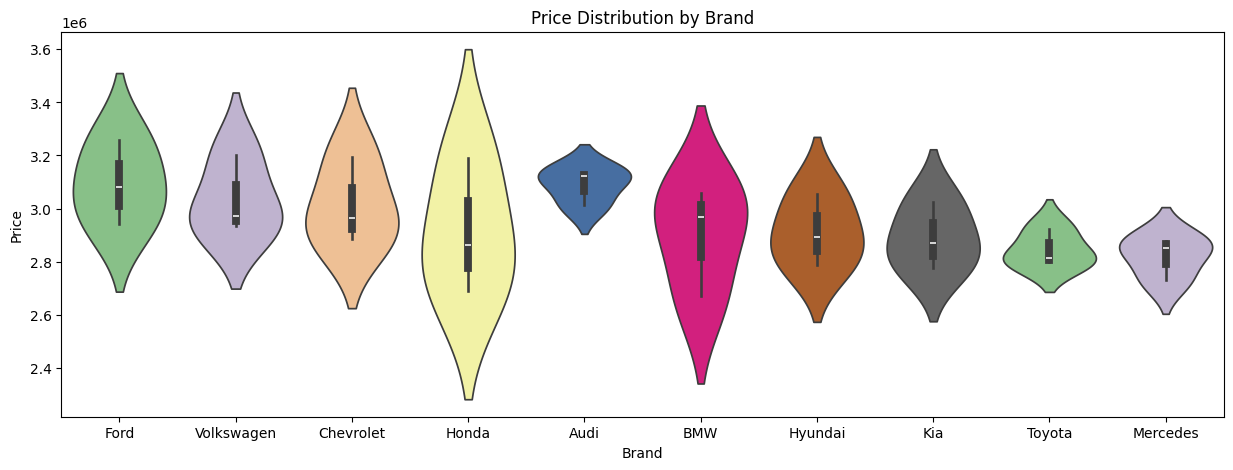

In [72]:
plt.figure(figsize= (15,5))
# ordersd=df.sort_values(by ='Price',scending=False)
sns.violinplot(x='Brand',y='Price',data=dfsum,palette='Accent')
plt.title('Price Distribution by Brand')
plt.show()

In [69]:
dfsum=pd.DataFrame(dfsum)